In [158]:
from google.colab import files
import pandas as pd

df = files.upload()
data = pd.read_csv('amazon_sales_dataset.csv')

Saving amazon_sales_dataset.csv to amazon_sales_dataset (2).csv


**EDA (Exploratory Data Analysis)**

In [159]:
data.describe()

,order_id,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2986.848740,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475
std,14433.901067,1156.374535,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968
min,1.000000,1000.000000,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000
25%,12500.750000,1983.000000,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000
50%,25000.500000,2983.000000,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000
75%,37500.250000,3989.000000,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000
max,50000.000000,4999.000000,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


In [161]:
data.head(100)

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2022-02-10,2964,Beauty,61.33,15,3,Middle East,Credit Card,4.1,418,52.13,156.39
96,97,2022-06-06,2172,Home & Kitchen,299.14,30,5,Europe,Credit Card,1.9,223,209.40,1047.00
97,98,2022-01-15,3039,Sports,396.42,10,3,North America,UPI,2.2,213,356.78,1070.34
98,99,2022-03-06,1092,Sports,66.83,30,3,Middle East,Debit Card,4.6,54,46.78,140.34


In [162]:
data.shape

(50000, 13)

**Data Cleaning**

In [163]:
Missing_Values = data.isnull().sum()
Unique_Values = data.nunique()

print("Missing Values In This Data:\n", Missing_Values)
print("------------------------------")
print("Unique Values In This Data:\n", Unique_Values)

Missing Values In This Data:
 order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64
------------------------------
Unique Values In This Data:
 order_id            50000
order_date            730
product_id           4000
product_category        6
price               31465
discount_percent        6
quantity_sold           5
customer_region         4
payment_method          5
rating                 41
review_count          500
discounted_price    30356
total_revenue       39768
dtype: int64


In [164]:
data['order_date'] = pd.to_datetime(data['order_date'])

data.dtypes

,0
order_id,int64
order_date,datetime64[ns]
product_id,int64
product_category,object
price,float64
discount_percent,int64
quantity_sold,int64
customer_region,object
payment_method,object
rating,float64


In [165]:
column_drop = ['order_id', 'product_id']
data = data.drop(columns=column_drop)


print("Current Column Data:\n", data.columns)

Current Column Data:
 Index(['order_date', 'product_category', 'price', 'discount_percent',
       'quantity_sold', 'customer_region', 'payment_method', 'rating',
       'review_count', 'discounted_price', 'total_revenue'],
      dtype='object')


dropping the order_id and product_id columns is done to prevent data leakage

In [166]:
data.dtypes

,0
order_date,datetime64[ns]
product_category,object
price,float64
discount_percent,int64
quantity_sold,int64
customer_region,object
payment_method,object
rating,float64
review_count,int64
discounted_price,float64


**Data Visualization**

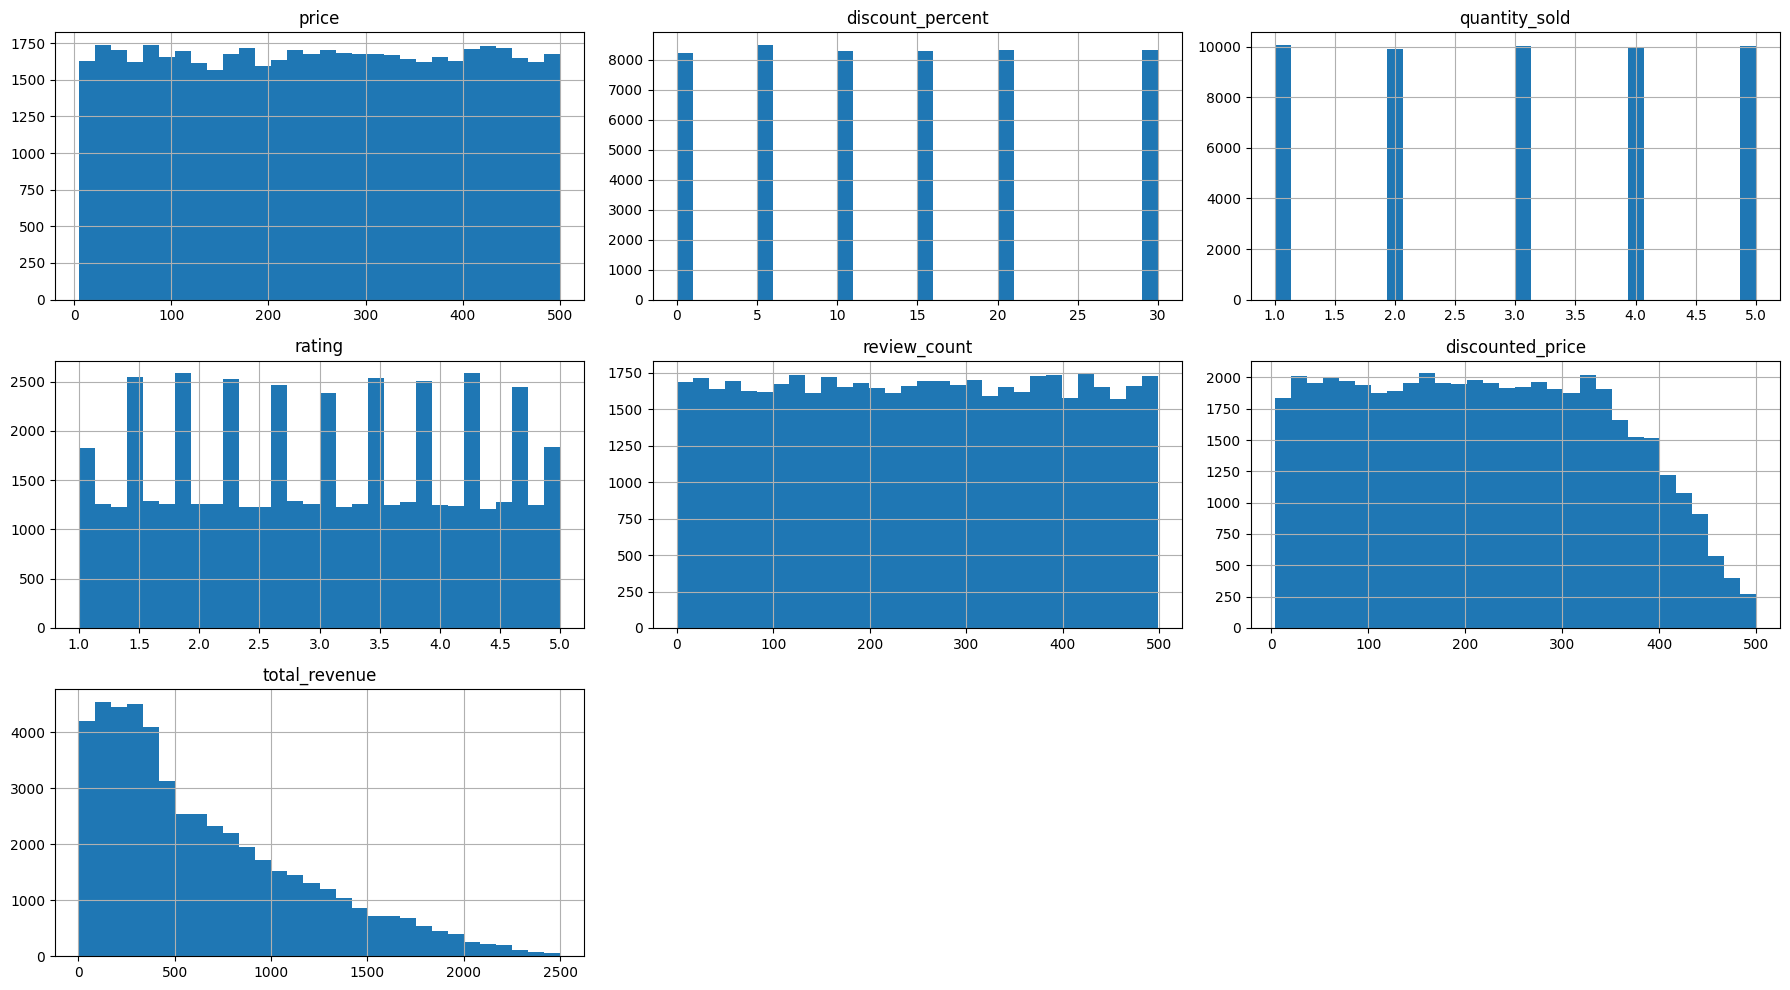

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

Numerical_Features = ['price', 'discount_percent','quantity_sold',
                      'rating', 'review_count', 'discounted_price',
                      'total_revenue']


data[Numerical_Features].hist(figsize=(18,10), bins=30)
plt.tight_layout()
plt.show()

Total Values in the product_category column: product_category
Beauty            8465
Fashion           8365
Books             8327
Electronics       8320
Sports            8265
Home & Kitchen    8258
Name: count, dtype: int64


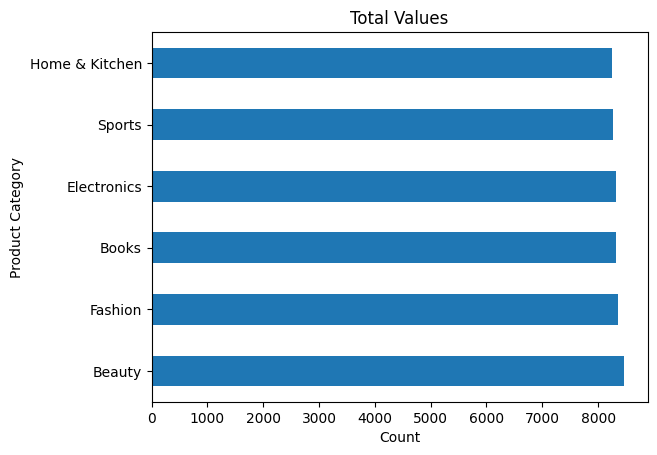

In [168]:
Product_Category = data['product_category'].value_counts()
print("Total Values in the product_category column:", Product_Category)


plt.figure()
Product_Category.plot(kind='barh')
plt.title('Total Values')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

Total Values in the customer_region column: customer_region
Asia             12526
North America    12517
Middle East      12505
Europe           12452
Name: count, dtype: int64


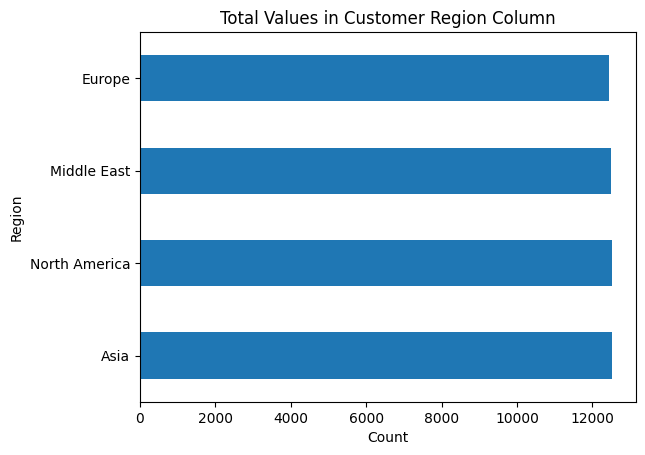

In [169]:
Customer_Region = data['customer_region'].value_counts()
print("Total Values in the customer_region column:", Customer_Region)

plt.show()
Customer_Region.plot(kind='barh')
plt.title("Total Values in Customer Region Column")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

Total Values in payment_method Column: payment_method
Wallet              10106
UPI                 10078
Debit Card           9981
Cash on Delivery     9927
Credit Card          9908
Name: count, dtype: int64


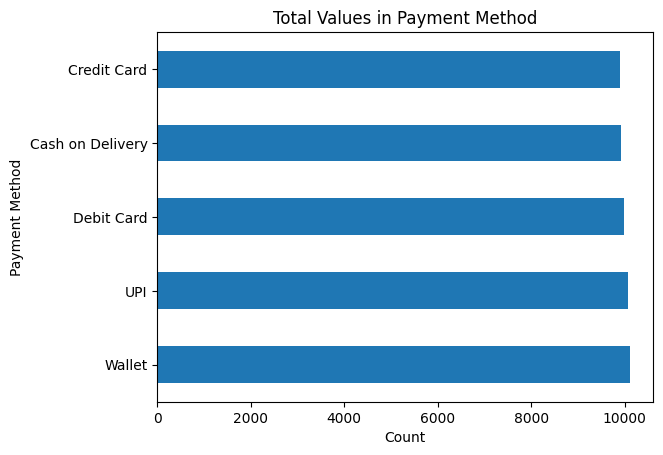

In [170]:
Payment_Method = data['payment_method'].value_counts()
print("Total Values in payment_method Column:", Payment_Method)

plt.figure()
Payment_Method.plot(kind='barh')
plt.title("Total Values in Payment Method")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()

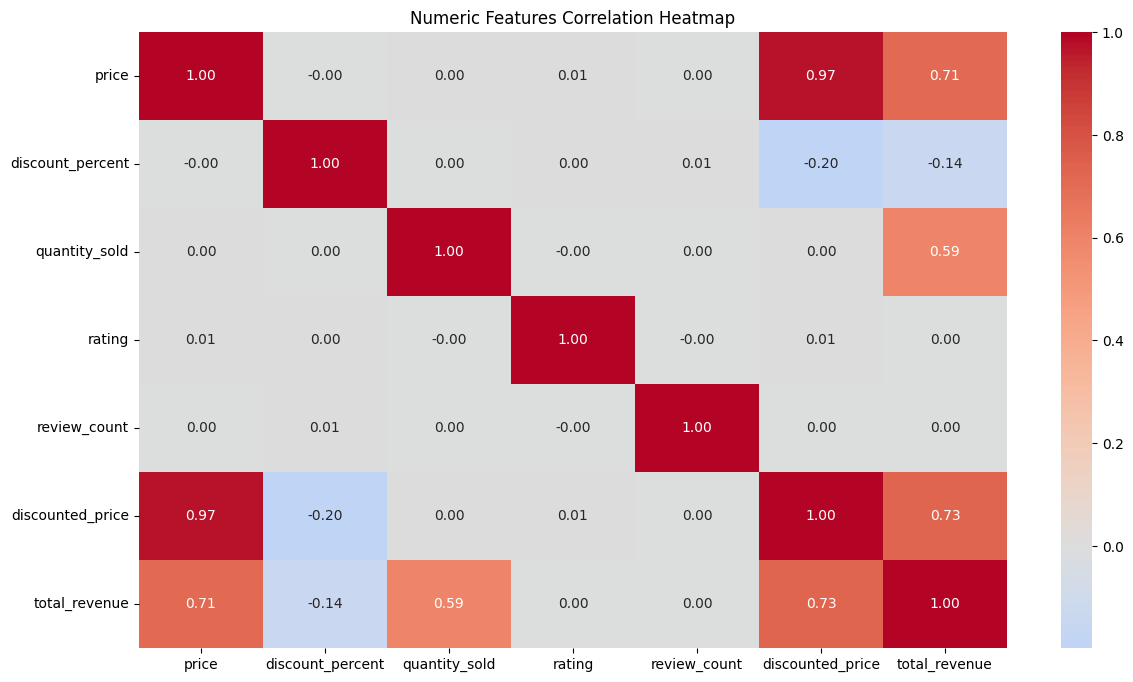

In [171]:
NumericFeat = data[Numerical_Features].corr()


plt.figure(figsize=(14,8))
sns.heatmap(
    NumericFeat,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Numeric Features Correlation Heatmap")
plt.show()

Sales Analysis by Region

In [172]:
region_sales = data.groupby('customer_region')[['total_revenue',
                                                'quantity_sold']].sum().reset_index()

region_sales

,customer_region,total_revenue,quantity_sold
0,Asia,8175199.83,37440
1,Europe,8112311.57,37302
2,Middle East,8301844.50,37694
3,North America,8277217.84,37534


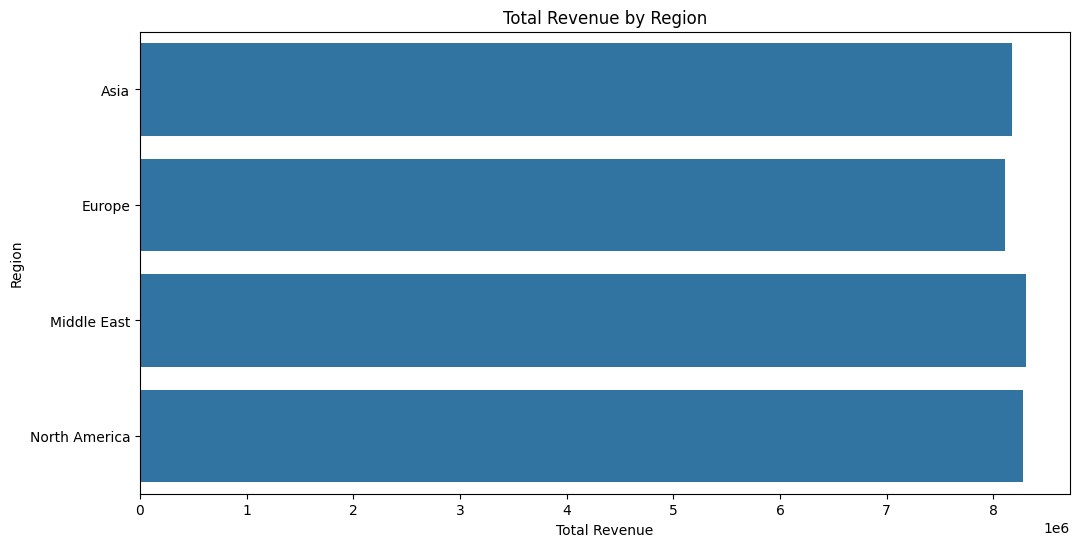

In [173]:
region_sales = data.groupby('customer_region')[['total_revenue',
                                                'quantity_sold']].sum().reset_index()


plt.figure(figsize=(12,6))
sns.barplot(data=region_sales, x='total_revenue', y = 'customer_region')
plt.title('Total Revenue by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.show()

Sales Analysis by Product Category

In [174]:
product_sales = data.groupby('product_category')[['total_revenue',
                                                  'quantity_sold']].sum().reset_index()


product_sales

,product_category,total_revenue,quantity_sold
0,Beauty,5550624.97,25422
1,Books,5484863.03,25065
2,Electronics,5470594.03,24898
3,Fashion,5480123.34,25089
4,Home & Kitchen,5473132.55,24743
5,Sports,5407235.82,24753


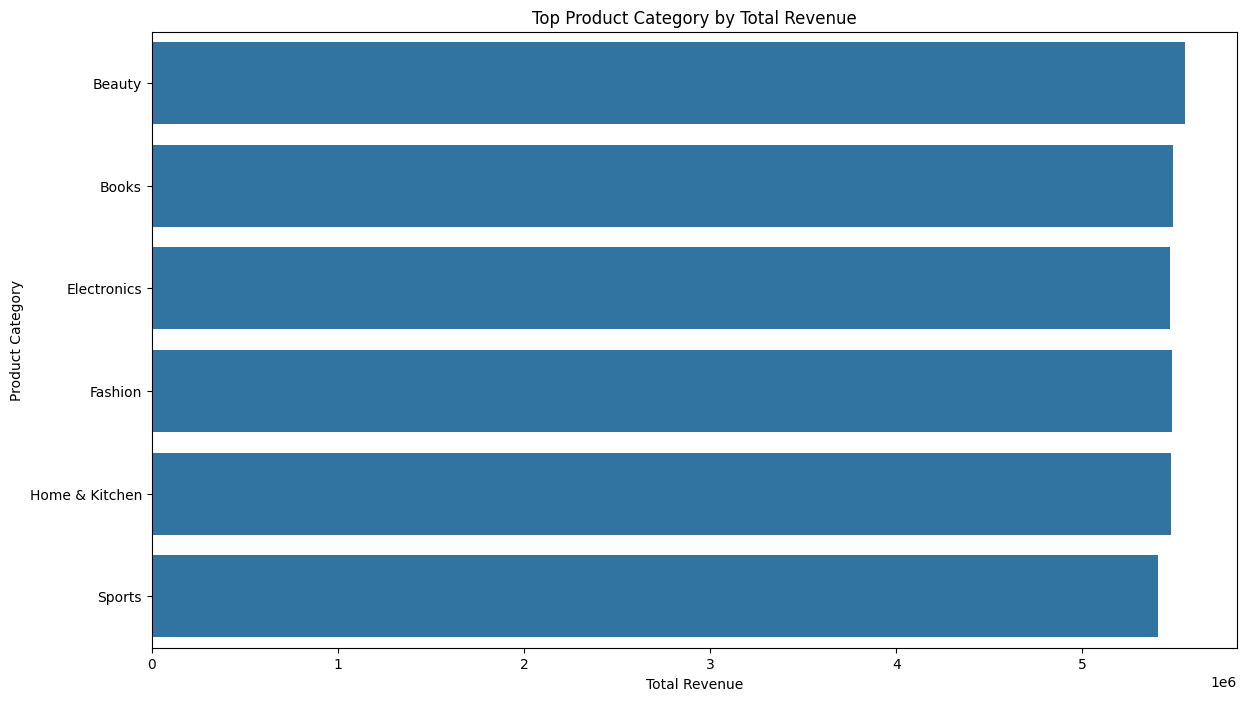

In [175]:
product_sales = data.groupby('product_category')[['total_revenue',
                                                  'quantity_sold']].sum().reset_index()


plt.figure(figsize=(14,8))
sns.barplot(data = product_sales, x = 'total_revenue', y = 'product_category')
plt.title('Top Product Category by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

Monthly Sales Trend

In [176]:
data['YearMonth'] = data['order_date'].dt.to_period('M')
Monthly_Sales = data.groupby('YearMonth')['total_revenue'].sum().reset_index()

Monthly_Sales

,YearMonth,total_revenue
0,2022-01,1419751.89
1,2022-02,1266714.29
2,2022-03,1392585.42
3,2022-04,1371955.83
4,2022-05,1374779.57
5,2022-06,1352125.49
6,2022-07,1346089.18
7,2022-08,1449308.06
8,2022-09,1403967.06
9,2022-10,1334818.11


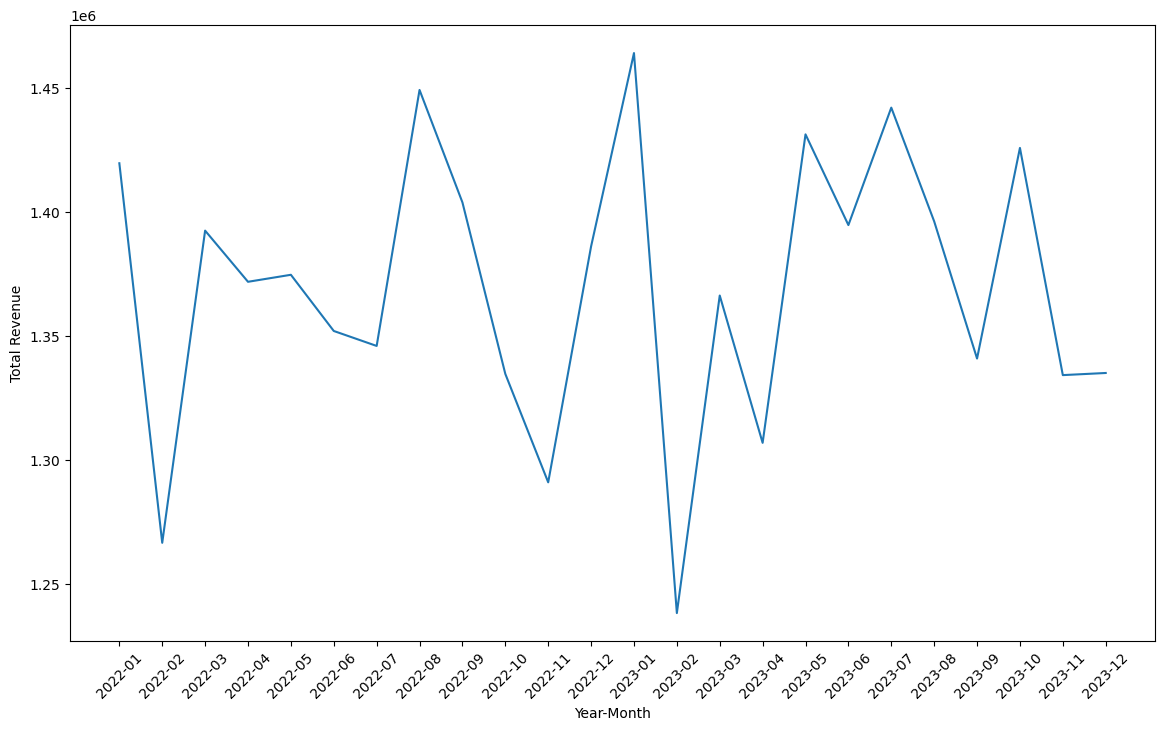

In [177]:
Monthly_Sales['YearMonth'] = Monthly_Sales['YearMonth'].astype(str)

plt.figure(figsize=(14,8))
sns.lineplot(data = Monthly_Sales, x = 'YearMonth', y = 'total_revenue')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**Feature Engineering**

In [178]:
data['is_discounted'] = (data['discount_percent'] > 0).astype(int)
data['is_discounted'].head()

,is_discounted
0,1
1,1
2,1
3,1
4,0


In [179]:
data['price_after_discount'] = data['price'] * (1 - data['discount_percent'] / 100)
data.columns

Index(['order_date', 'product_category', 'price', 'discount_percent',
       'quantity_sold', 'customer_region', 'payment_method', 'rating',
       'review_count', 'discounted_price', 'total_revenue', 'YearMonth',
       'is_discounted', 'price_after_discount'],
      dtype='object')

In [180]:
med = data['total_revenue'].median()
data['High Revenue'] = (data['total_revenue'] > med).astype(int)

In [181]:
data.dtypes

,0
order_date,datetime64[ns]
product_category,object
price,float64
discount_percent,int64
quantity_sold,int64
customer_region,object
payment_method,object
rating,float64
review_count,int64
discounted_price,float64


**Encode**

In [182]:
label_category = {
    'Beauty' : 0,
    'Fashion' : 1,
    'Books' : 2,
    'Electronics' : 3,
    'Sports' : 4,
    'Home & Kitchen' : 5
}

data['product_category'] = data['product_category'].map(label_category)
data['product_category'].head()

,product_category
0,2
1,1
2,4
3,2
4,0


In [183]:
label_region = {
    'Asia': 0,
    'Europe': 1,
    'Middle East': 2,
    'North America': 3
}


data['customer_region'] = data['customer_region'].map(label_region)
data['customer_region'].head()

,customer_region
0,3
1,0
2,1
3,2
4,2


**Split Data**

In [184]:
from sklearn.model_selection import train_test_split

features = ['price_after_discount','is_discounted','rating','review_count',
            'product_category','customer_region']

X = data[features]
y = data['High Revenue']


TrainX,ValX,TrainY,ValY = train_test_split(X,y,test_size = 0.2,
                                           random_state = 42)


Numeric_Features = TrainX.columns

TrainX.shape, ValX.shape



((40000, 6), (10000, 6))

In [185]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

transform = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transform, Numeric_Features)
    ]
)

TrainXTest = preprocessor.fit_transform(TrainX)
ValXTest = preprocessor.transform(ValX)

**Modelling**

1. Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(
    max_iter = 1000,
    solver = 'saga',
    class_weight = 'balanced'
)

model.fit(TrainXTest,TrainY)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga')

In [187]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(ValXTest)

print("ModelAccuracyFirstTry:", accuracy_score(ValY, y_pred))
print(classification_report(ValY,y_pred))

ModelAccuracyFirstTry: 0.7657
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5064
           1       0.76      0.76      0.76      4936

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



2. Random Forestl Classifier

In [188]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(
    n_estimators = 250,
    random_state = 42,
    class_weight = 'balanced'
)


modelRF.fit(TrainXTest, TrainY)

RandomForestClassifier(class_weight='balanced', n_estimators=250,
                       random_state=42)

In [189]:
y_predRF = modelRF.predict(ValXTest)

print("AccuracyScore(Random Forest):", accuracy_score(ValY,y_predRF))
print(classification_report(ValY,y_predRF))

AccuracyScore(Random Forest): 0.7761
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      5064
           1       0.73      0.86      0.79      4936

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.79      0.78      0.77     10000



3. XGB Classifier

In [190]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier(
    n_estimators = 300,
    learning_rate = 0.05,
    max_depth = 6,
    random_state = 42,
    use_label_encoder = False,
    eval_metric = 'logloss'
)


modelXGB.fit(TrainXTest,TrainY)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [07:22:59] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [191]:
y_predXGB = modelXGB.predict(ValXTest)

print("AccuracyScore(XGB):", accuracy_score(ValY,y_predXGB))
print(classification_report(ValY,y_predXGB))

AccuracyScore(XGB): 0.7878
              precision    recall  f1-score   support

           0       0.88      0.68      0.76      5064
           1       0.73      0.90      0.81      4936

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



4. Linear SVC

In [192]:
from sklearn.svm import LinearSVC

modelSVC = LinearSVC(class_weight
                     = 'balanced')

modelSVC.fit(TrainXTest,TrainY)

LinearSVC(class_weight='balanced')

In [193]:
y_predSVC = modelSVC.predict(ValXTest)

print("Model SVC Accuration:", accuracy_score(ValY,y_pred))
print(classification_report(ValY,y_pred))

Model SVC Accuration: 0.7657
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5064
           1       0.76      0.76      0.76      4936

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



Tuning XGB

In [194]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [4,6,8],
    'child_weight': [1,3,5],
    'sub_sample' : [0.7,0.8,0.9],
    'colsample_bytree' : [0.7,0.8,0.9]

}


grid_search = GridSearchCV(
    estimator = modelXGB,
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = 3,
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(TrainXTest,TrainY)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [07:26:09] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "child_weight", "sub_sample", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=6,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=300,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'child_weight': [1, 3, 5],
                         'colsample_bytree': [0.7, 0.8, 0.9],
                         'max_depth': [4, 6, 8],
                         'sub_sample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=1)

In [195]:
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(best_model)

Best parameters: {'child_weight': 1, 'colsample_bytree': 0.7, 'max_depth': 4, 'sub_sample': 0.7}
XGBClassifier(base_score=None, booster=None, callbacks=None, child_weight=1,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, ...)


In [196]:
modelXGBFinal = XGBClassifier(
    n_estimators = 300,
    learning_rate =0.05,
    max_depth = 4,
    min_child_weight = 1,
    colsample_bytree = 0.7,
    subsample = 0.7,
    random_state  = 42,
    use_label_encoder = False,
    eval_metric = 'logloss'
)

modelXGBFinal.fit(TrainXTest, TrainY)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [07:26:09] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [197]:
y_predFinal = modelXGBFinal.predict(ValXTest)

print("AccuracyScore(XGB Final):", accuracy_score(ValY,y_predFinal))
print(classification_report(ValY,y_predFinal))

AccuracyScore(XGB Final): 0.7893
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      5064
           1       0.73      0.90      0.81      4936

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000



In [198]:
important_features = modelXGBFinal.feature_importances_
features_names = list(features)

feature_important_xgb = pd.Series(important_features,index = features_names).sort_values(
    ascending = False
)


feature_important_xgb.head(6)

,0
price_after_discount,0.910308
is_discounted,0.020709
review_count,0.020090
rating,0.018545
customer_region,0.015415
product_category,0.014933


**Revenue prediction was heavily driven by pricing features. Removing price-related features reduced model performance to near random levels, indicating revenue in this dataset is primarily price-dependent.**

**INSIGHT**

Revenue dalam dataset ini sangat price-driven dan hampir tidak dipengaruhi faktor lain

Learning Curve


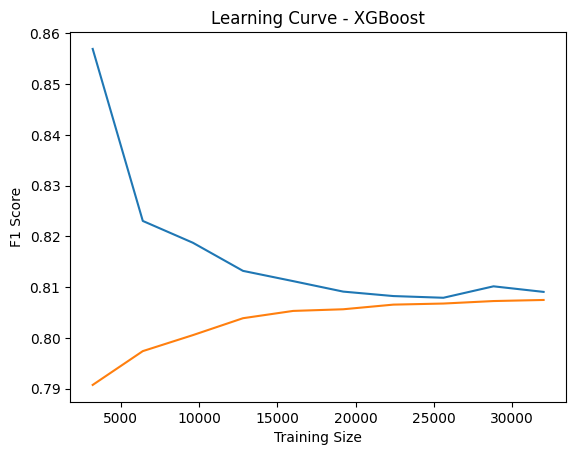

In [199]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    modelXGBFinal,
    TrainXTest,
    TrainY,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_mean)
plt.plot(train_sizes, val_mean)
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.title("Learning Curve - XGBoost")
plt.show()

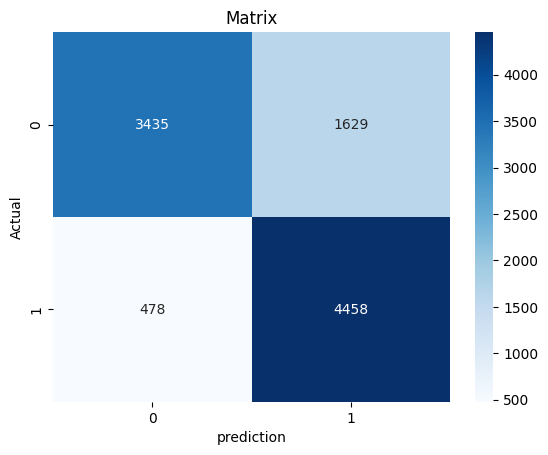

In [210]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(ValY,y_predFinal )

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("prediction")
plt.ylabel("Actual")
plt.title("Matrix")
plt.show()

**MODEL INFERENCE**

In [206]:
model = joblib.load("xgb_model.pkl")

In [207]:
import joblib

model = joblib.load("xgb_model.pkl")

def predict_product_status(model, input_dict, reference_columns):
    df = pd.DataFrame(columns=reference_columns)
    df.loc[0] = input_dict
    df = df[reference_columns]

    prediction = model.predict(df)[0]
    probability = model.predict_proba(df)[0][prediction]

    label_map = {
        0: "Low Sales",
        1: "High Sales"
    }

    return {
        "prediction_label": label_map[prediction],
        "confidence": float(probability)
    }

In [208]:
new_product = {
    'price_after_discount': 120000,
    'is_discounted': 1,
    'review_count': 250,
    'rating': 4.5,
    'customer_region': 2,
    'product_category': 5
}

In [209]:
result = predict_product_status(
    model=model,
    input_dict=new_product,
    reference_columns=TrainX.columns
)

print("Prediction:", result["prediction_label"])
print("Confidence:", round(result["confidence"] * 100, 2), "%")

Prediction: High Sales
Confidence: 74.01 %
